1. Подготовьте данные для word2vec по одной из недавно прочитанных книг, удалив все символы, кроме букв и пробелов и обучите модель. Посмотрите результат.

In [22]:
import codecs
import numpy as np
import gensim
import re
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [23]:
def format_text(docs: list, points = ''):
    docs = [re.sub("[^А-Яа-я " + points + "]", "", doc) for doc in docs]
    docs = [re.sub(' +', ' ', doc.lower()) for doc in docs]
    docs = list(filter(None, docs))
    return docs

In [24]:
with codecs.open('data/pin.txt', encoding='utf-8', mode='r') as f:
    docs = f.readlines()
docs = format_text(docs, "!?.")
max_sentence_len = 12
sentences = [sent for doc in docs for sent in re.split('[.!?]', doc)]
sentences = [[word for word in sent.lower().split()[:max_sentence_len]] for sent in sentences]
print(len(sentences), 'предложений')

18345 предложений


In [25]:
# Обучение модели
word_model = gensim.models.Word2Vec(sentences, vector_size=100, min_count=1, window=5, epochs=100)

In [26]:
print('Похожие слова:')
for word in ['раскольников', 'топор', 'жизнь', 'человек', 'бог', 'деньги', 'право']:
    most_similar = ', '.join('%s (%.2f)' % (similar, dist) for similar, dist in word_model.wv.most_similar(word)[:8])
    print('  %s -> %s' % (word, most_similar))

Похожие слова:
  раскольников -> он (0.65), свидригайлов (0.58), мещанин (0.49), постоял (0.46), переднюю (0.43), зосимов (0.43), оборачиваясь (0.42), лебезятников (0.42)
  топор -> схватил (0.67), расстегнул (0.61), бутылку (0.61), опустил (0.60), вынул (0.58), лезвием (0.57), правый (0.56), дернул (0.56)
  жизнь -> кабаке (0.69), будущую (0.62), ихнюю (0.59), всюто (0.58), всю (0.57), твою (0.55), верхнюю (0.55), напролет (0.55)
  человек -> шарманщик (0.64), толстою (0.49), черноволосый (0.48), превосходный (0.48), горячей (0.47), кафтане (0.47), шеей (0.45), мальчишка (0.41)
  бог -> постыдного (0.48), предал (0.46), предупреждаю (0.46), кто (0.44), хорошос (0.44), презренного (0.44), утопится (0.44), продолжала (0.44)
  деньги -> успокойся (0.46), сосчитав (0.46), расписки (0.46), вынесли (0.46), обои (0.46), грош (0.45), корни (0.44), убивает (0.44)
  право -> одинаковое (0.52), имеете (0.50), способны (0.50), мертвого (0.48), имеют (0.47), коммуны (0.47), член (0.46), люблю (0.4

In [27]:
# Получение вектора
word_model.wv.get_vector('топор')

array([-0.39951888,  0.8912397 , -1.5973226 ,  0.8102004 ,  0.8058063 ,
        1.6356167 ,  0.57824945,  1.7048991 ,  0.4905908 ,  0.82535976,
       -0.31362787,  1.1019832 ,  0.24623854, -0.58181655,  1.692493  ,
       -0.354531  ,  1.5446209 , -0.42054185, -0.9475763 ,  0.42655993,
       -0.39634284, -1.0408797 , -0.68639964, -0.31996408, -0.81146806,
        1.3357495 ,  2.32386   ,  0.3831257 , -0.7369332 ,  3.1071177 ,
       -1.2317047 , -0.34250063,  0.20491984, -0.16650717,  0.8431681 ,
        1.553574  , -1.0479397 , -0.6459416 , -0.15856019,  0.24086373,
        0.28208542, -0.3699437 ,  1.7177438 ,  0.5682484 ,  0.34930095,
        0.11507092,  0.6953298 , -0.561048  ,  1.4908742 ,  0.72121525,
        0.4579773 , -0.13321398, -0.38115907, -0.50508535,  0.24548773,
        1.320568  ,  0.97083443,  0.3650036 , -0.43738884, -0.27026466,
        0.2844159 , -0.03570403,  0.1358645 ,  0.7224156 , -0.08425009,
        0.10052069, -0.28464696,  0.8844513 , -1.3443834 , -0.36

3. Из этого же текста (п.1) возьмите небольшой фрагмент, разбейте на предложения с одинаковым числом символов. Каждый символ предложения закодируйте с помощью one hot encoding. В итоге у вас должен получиться массив размера (n_sentences, sentence_len, encoding_size).

In [28]:
from sklearn.preprocessing import OneHotEncoder

fragment = docs[105:150]

In [29]:
max_sentence_len = 40
# разделить на предложения, огрнаничить их по количеству символов и удалить незначащие пробелы
sentences_as_strings = [' '.join(sent.lower().split())[:max_sentence_len] for doc in fragment for sent in re.split('[.!?]', doc)]
# удалить пустые предложения
sentences_as_strings = list(filter(None, sentences_as_strings))
# строки в списки символов
sentences_as_letters_list = [[char.lower() for char in sent] for sent in sentences_as_strings]
# отфильтровать маленькие предложения
sentences = np.array(list(filter(lambda x: len(x) == max_sentence_len, sentences_as_letters_list)))
sentences

array([['н', 'у', ' ', ..., 'д', 'у', 'м'],
       ['н', 'о', ' ', ..., 'м', 'о', 'ж'],
       ['с', 'о', 'н', ..., 'л', ' ', 'о'],
       ...,
       ['б', 'о', 'ю', ..., ' ', 'и', ' '],
       ['в', 'с', 'п', ..., ' ', 'п', 'р'],
       ['о', 'б', 'н', ..., 'с', 'ч', 'е']], dtype='<U1')

In [30]:
# список символов для one hot encoding - алфавит
alphabet = [chr(let) for let in range(ord('а'), ord('я') + 1)] + ['ё', ' ']
# создать кодировщик по алфавиту
ohe = OneHotEncoder(categories=list(np.array(alphabet).reshape(1, -1)))
# пустой массив для записи
encoded_sentences = np.empty((*sentences.shape, len(alphabet)))
# кодирование
for i, sent in enumerate(sentences):
    encoded_sentences[i] = ohe.fit_transform(sent.reshape(-1, 1)).toarray()

In [31]:
print(encoded_sentences.shape)
print(encoded_sentences)

(166, 40, 34)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.

4. На полученных в п.3 задании обучение модель RNN для предсказания следующего символа. Посмотрите результат при последовательной генерации.

In [32]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [77]:
class RNN(nn.Module):
    def __init__(self, alphabet_length, sentence_length):
        super().__init__()
        self.lstm = nn.LSTM(alphabet_length, sentence_length, num_layers=2, batch_first=True)
        self.linear = nn.Linear(sentence_length, alphabet_length)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.linear(out)

In [78]:
data_tr = encoded_sentences

num_remembered_char = 15

x_data = [data_tr[:, i:i+num_remembered_char, :] for i in range(max_sentence_len-num_remembered_char-1)]
y_data = [data_tr[:, i+1:i+num_remembered_char+1, :] for i in range(max_sentence_len-num_remembered_char-1)]

x_data = np.concatenate(x_data, axis=0)
y_data = np.concatenate(y_data, axis=0)

tensor_x = torch.Tensor(x_data) # transform to torch tensor
tensor_y = torch.Tensor(y_data)

pred_text_dataset = TensorDataset(tensor_x, tensor_y) # create your dataset
pred_text_dataloader = DataLoader(pred_text_dataset, batch_size=16) # create your dataloader

model = RNN(len(alphabet), 128)
opt = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

model.to(device)

RNN(
  (lstm): LSTM(34, 128, num_layers=2, batch_first=True)
  (linear): Linear(in_features=128, out_features=34, bias=True)
)

In [79]:
def id2char(id):
    return alphabet[id.item()]

def prepare_input(input, encoder):
    sent = np.array(list(input)).reshape(-1, 1)
    x_tst = torch.Tensor(encoder.fit_transform(sent).toarray())
    x_tst = x_tst.reshape((1, *x_tst.shape))
    return x_tst.to(device)

def predict_text(model, encoder, input, text_size):
    prediction = input
    with torch.no_grad():
        for _ in range(text_size):
            out = model(prepare_input(prediction, encoder))
            a = out[-1].max(dim = 1, keepdim=True)[1]
            prediction += id2char(a[-1])
    return prediction

In [80]:
NUM_EPOCHS = 50
for epoch in range(NUM_EPOCHS):
    running_loss = 0.0

    for x_t, y_t in pred_text_dataloader:
        x_t = x_t.to(device)
        y_t = y_t.to(device)
        
        # zero the parameter gradients
        opt.zero_grad()
        
        # forward + backward + optimize
        output = model(x_t)
        loss = criterion(output, y_t)
        loss.backward()
        opt.step()
        
        # print statistics
        running_loss += loss

    with torch.no_grad():
        train_loss = running_loss / len(pred_text_dataloader)

    print(f'[Epoch: {epoch + 1:2d}] text: {predict_text(model, ohe, " ", 40)}')

[Epoch:  1] text:  несколько днено посала он при тебя причи
[Epoch:  2] text:  принесу а не свадрагилось подле вас дуня
[Epoch:  3] text:  принесу а не посетило проговорил расколь
[Epoch:  4] text:  приглашать давать вот уже подиа мар петр
[Epoch:  5] text:  приглашать давать вот уже двадцать неско
[Epoch:  6] text:  подслушала своем не посетило ли наши мук
[Epoch:  7] text:  проговорил раскольниковерже не приписыва
[Epoch:  8] text:  полилу на бождою сегодня и самала прогов
[Epoch:  9] text:  проговорил раскольно и он хочет открыл г
[Epoch: 10] text:  помео он объявил нам что было нельзя не 
[Epoch: 11] text:  не посетило ли и может сносить и даже в 
[Epoch: 12] text:  потому что несколько словом милый родя о
[Epoch: 13] text:  потому что несколько словый и пожалуй пр
[Epoch: 14] text:  потому что несколько словало большой ска
[Epoch: 15] text:  не приписывает он грубостию своем не пос
[Epoch: 16] text:  не посетило ли и он хочение  обвинишь ме
[Epoch: 17] text:  не приписывает от рад

In [81]:
print(predict_text(model, ohe, "т", 128))

то я и дуня выез тебя крепкокрепко и целую бессчить рассчитали с дунечко он обниманыли написали что этот сумасловна в поли уне по


2. Для обучения на нефтяных скважин добавьте во входные данные информацию со столбцов Gas, Water (т.е. размер x_data будет (440, 12, 3)) и обучите новую модель. Выход содержит Liquid, Gas и Water (для дальнейшего предсказания). Графики с результатами только для Liquid.

In [55]:
import pandas as pd

df = pd.read_csv('./data/production.csv')
df.head()

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate
0,5005072170100,2014,11,9783,11470,1.172442,10558,1.079219,14,2016-04-06 17:20:05.757
1,5005072170100,2014,12,24206,26476,1.093778,5719,0.236264,31,2016-04-06 17:20:05.757
2,5005072170100,2015,1,20449,26381,1.290088,2196,0.107389,31,2016-04-06 17:20:05.757
3,5005072170100,2015,2,6820,10390,1.523460,583,0.085484,28,2016-04-06 17:20:05.757
4,5005072170100,2015,3,7349,7005,0.953191,122,0.016601,13,2016-06-16 14:07:33.203


In [56]:
# Подготовка данных по добыче
def groupby_API(column):
    return df.groupby('API')[column].apply(lambda df_: df_.reset_index(drop=True)).unstack()


liquid = groupby_API('Liquid')
gas = groupby_API('Gas')
water = groupby_API('Water')
liquid.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
API,,,,,,,,,,,,,,,,,,,,,
5005072170100,9783,24206,20449,6820,7349,16552,13844,10655,6135,11105,...,6547,5117,5280,4762,4962,4478,4328,4777,3849,3835
5123377130000,2341,4689,3056,1979,2037,2260,1961,1549,1364,1380,...,898,787,880,879,773,737,543,732,559,633
5123379280000,6326,6405,6839,6584,4775,3917,3840,3031,3137,2669,...,1795,1852,1734,1588,1739,1473,1472,1378,1235,1331
5123379400000,8644,13977,9325,6445,5326,4538,3403,2534,2685,2597,...,1537,1331,1305,1510,1476,1729,1606,1388,1632,814
5123385820100,1753,4402,1187,1204,1176,1523,1169,782,634,597,...,60,0,0,0,0,0,236,830,6,571


In [57]:
def scale(df):
    data = df.values
    data = data / data.max()
    return data[:, :, np.newaxis]


# Масштабирование
liquid = scale(liquid)
gas = scale(gas)
water = scale(water)

data = np.concatenate([liquid, gas, water], axis=2)

In [58]:
# Деление на трейн/тест
data_tr = data[:40]
data_tst = data[40:]
print(data_tr.shape, data_tst.shape)

(40, 24, 3) (10, 24, 3)


In [59]:
x_data = [data_tr[:, i:i+12] for i in range(11)]
y_data = [data_tr[:, i+1:i+13] for i in range(11)]

x_data = np.concatenate(x_data, axis=0)
y_data = np.concatenate(y_data, axis=0)
print(x_data.shape, y_data.shape)

(440, 12, 3) (440, 12, 3)


In [60]:
tensor_x = torch.Tensor(x_data) # transform to torch tensor
tensor_y = torch.Tensor(y_data)

oil_dataset = TensorDataset(tensor_x, tensor_y) # create your dataset
oil_dataloader = DataLoader(oil_dataset, batch_size=16) # create your dataloader

In [61]:
for x_t, y_t in oil_dataloader:
    break
x_t.shape, y_t.shape

(torch.Size([16, 12, 3]), torch.Size([16, 12, 3]))

In [62]:
class OilModel(nn.Module):
    def __init__(self, timesteps=12, units=32):
        super().__init__()
        self.lstm = nn.LSTM(3, units, 2, batch_first=True)
        self.dense = nn.Linear(units, 3)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h, _ = self.lstm(x)
        outs = []
        for i in range(h.shape[0]):
            outs.append(self.relu(self.dense(h[i])))
        out = torch.stack(outs, dim=0)
        return out

In [63]:
model = OilModel()
opt = optim.Adam(model.parameters())
criterion = nn.MSELoss()

In [73]:
NUM_EPOCHS = 80

for epoch in range(NUM_EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    num = 0
    for x_t, y_t in oil_dataloader:
        # zero the parameter gradients
        opt.zero_grad()

        # forward + backward + optimize
        outputs = model(x_t)
        loss = criterion(outputs, y_t)
        loss.backward()
        opt.step()

        # print statistics
        running_loss += loss.item()
        num += 1
        
    print(f'[Epoch: {epoch + 1:2d}] loss: {running_loss / num:.3f}')

print('Finished Training')

[Epoch:  1] loss: 0.003
[Epoch:  2] loss: 0.003
[Epoch:  3] loss: 0.003
[Epoch:  4] loss: 0.003
[Epoch:  5] loss: 0.002
[Epoch:  6] loss: 0.002
[Epoch:  7] loss: 0.002
[Epoch:  8] loss: 0.002
[Epoch:  9] loss: 0.002
[Epoch: 10] loss: 0.002
[Epoch: 11] loss: 0.002
[Epoch: 12] loss: 0.002
[Epoch: 13] loss: 0.002
[Epoch: 14] loss: 0.002
[Epoch: 15] loss: 0.002
[Epoch: 16] loss: 0.002
[Epoch: 17] loss: 0.002
[Epoch: 18] loss: 0.002
[Epoch: 19] loss: 0.002
[Epoch: 20] loss: 0.002
[Epoch: 21] loss: 0.002
[Epoch: 22] loss: 0.002
[Epoch: 23] loss: 0.002
[Epoch: 24] loss: 0.002
[Epoch: 25] loss: 0.002
[Epoch: 26] loss: 0.002
[Epoch: 27] loss: 0.002
[Epoch: 28] loss: 0.002
[Epoch: 29] loss: 0.002
[Epoch: 30] loss: 0.002
[Epoch: 31] loss: 0.002
[Epoch: 32] loss: 0.002
[Epoch: 33] loss: 0.002
[Epoch: 34] loss: 0.002
[Epoch: 35] loss: 0.002
[Epoch: 36] loss: 0.002
[Epoch: 37] loss: 0.002
[Epoch: 38] loss: 0.002
[Epoch: 39] loss: 0.002
[Epoch: 40] loss: 0.002
[Epoch: 41] loss: 0.002
[Epoch: 42] loss

In [74]:
# Предскажем на год вперёд используя данные только первого года
x_tst = data_tst[:, :12]
predicts = np.zeros((x_tst.shape[0], 0, x_tst.shape[2]))

for i in range(12):
    x = np.concatenate((x_tst[:, i:], predicts), axis=1)
    x_t = torch.from_numpy(x).float()
    pred = model(x_t).detach().numpy()
    last_pred = pred[:, -1:]  # Нас интересует только последний месяц
    predicts = np.concatenate((predicts, last_pred), axis=1)

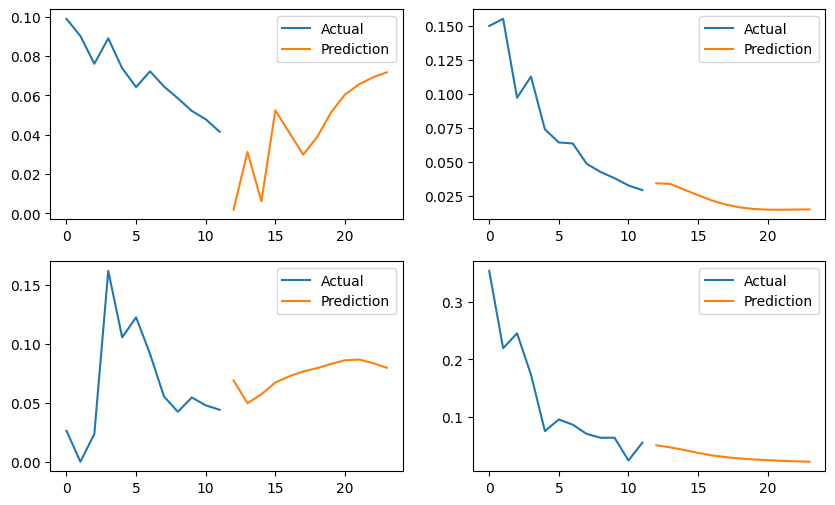

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for iapi in range(4):
    plt.subplot(2, 2, iapi+1)
    plt.plot(np.arange(x_tst.shape[1]), x_tst[iapi, :, 0], label='Actual')
    plt.plot(np.arange(predicts.shape[1])+x_tst.shape[1], predicts[iapi, :, 0], label='Prediction')
    plt.legend()
plt.show()